In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import pandas as pd
from skimage import io
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/Haziel/Documents/Tec/Taller de Investigacion 2/Smart Gloves/Codigo/sensores.csv")
df.head()

,ax,ay,az,gx,gy,gz,d1,d2,d3,d4,target
0,3427,-1924,15855,669,756,-1437,456.0,434.0,596.0,618.0,0
1,3475,-1936,15947,649,548,-1391,456.0,442.0,596.0,611.0,0
2,3623,-1852,15851,747,293,-1302,451.0,421.0,603.0,611.0,0
3,3751,-1644,15911,702,-65,-1079,451.0,438.0,596.0,603.0,0
4,3879,-1368,15771,618,-162,-873,456.0,430.0,596.0,618.0,0


In [3]:
df.groupby("target").mean()

,ax,ay,az,gx,gy,gz,d1,d2,d3,d4
target,,,,,,,,,,
0,10567.569083,-5645.707250,10365.621067,164.218878,-447.131327,-233.299590,456.114911,425.012312,590.487004,610.514364
1,13494.983871,-3789.892473,8567.811828,280.037634,-115.611559,-284.416667,175.326613,184.555108,216.622312,193.672043
2,11952.331115,-3504.732113,10582.407654,303.041597,-214.049917,-232.527454,312.632280,297.309484,359.505824,274.281198
3,13840.838765,-1584.542024,8759.782161,353.087479,-167.595197,-251.571184,156.144082,327.986278,464.072041,397.747856
4,13460.013205,-3286.636255,8559.081633,238.831933,-138.698679,-148.410564,430.847539,356.833133,436.444178,191.217287


In [4]:
df.shape

(3492, 11)

# Dividir dataset en conjunto de entrenamiento y validacion
### Dividir utilizando la distribución normal

In [5]:
a = np.random.randn(len(df))

(array([  3.,  19., 113., 411., 759., 972., 713., 373., 113.,  16.]),
 array([-3.94449423, -3.22636654, -2.50823885, -1.79011116, -1.07198346,
        -0.35385577,  0.36427192,  1.08239961,  1.80052731,  2.518655  ,
         3.23678269]),
 <a list of 10 Patch objects>)

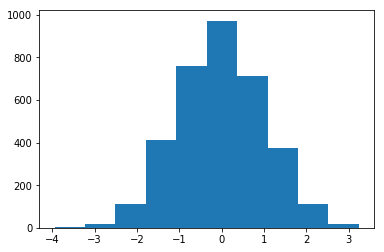

In [6]:
plt.hist(a)

In [7]:
check = (a<0.8)

In [8]:
check.shape

(3492,)

In [9]:
df_training = df[check] # Me quedo con los registros de mi dataset elegidos como true
df_testing = df[~check] # Me quedo con los elegidos como false

In [10]:
len(df_training) # 80% de los datos

2766

In [11]:
len(df_testing) # 20% de los datos

726

#### ## Usando una funcion de shuffle para revolver mis registros

In [12]:
df_training.head()

,ax,ay,az,gx,gy,gz,d1,d2,d3,d4,target
0,3427,-1924,15855,669,756,-1437,456.0,434.0,596.0,618.0,0
1,3475,-1936,15947,649,548,-1391,456.0,442.0,596.0,611.0,0
3,3751,-1644,15911,702,-65,-1079,451.0,438.0,596.0,603.0,0
4,3879,-1368,15771,618,-162,-873,456.0,430.0,596.0,618.0,0
5,3871,-1496,15527,655,-303,-675,456.0,438.0,603.0,611.0,0


In [13]:
import sklearn

df_training = sklearn.utils.shuffle(df_training)
df_testing = sklearn.utils.shuffle(df_testing)

In [14]:
df_testing.head()

,ax,ay,az,gx,gy,gz,d1,d2,d3,d4,target
351,11819,-5040,9483,545,-855,-185,461.0,421.0,588.0,603.0,0
3110,13051,-4224,9335,992,-1149,625,447.0,370.0,417.0,180.0,4
1756,11939,-3120,10231,4631,-2565,2698,293.0,275.0,342.0,261.0,2
2298,13871,-1568,8163,186,-40,6,157.0,325.0,451.0,354.0,3
2559,13103,-1000,9755,116,-646,345,155.0,333.0,475.0,461.0,3


In [15]:
df_testing.head()

,ax,ay,az,gx,gy,gz,d1,d2,d3,d4,target
351,11819,-5040,9483,545,-855,-185,461.0,421.0,588.0,603.0,0
3110,13051,-4224,9335,992,-1149,625,447.0,370.0,417.0,180.0,4
1756,11939,-3120,10231,4631,-2565,2698,293.0,275.0,342.0,261.0,2
2298,13871,-1568,8163,186,-40,6,157.0,325.0,451.0,354.0,3
2559,13103,-1000,9755,116,-646,345,155.0,333.0,475.0,461.0,3


## Creando la arquitectura de la red neuronal

In [16]:
dim_input = 10
n_categories = 5

In [17]:
y_train = df_training.pop("target")
y_test = df_testing.pop("target")

In [18]:
print(len(y_train))
print(len(y_test))

2766
726


In [19]:
def getArrayLabels(array):
    y_train_labels = np.array([])
    y_train_labels = np.zeros((len(array), n_categories))
    
    for target in enumerate(array):
        y_train_labels[target[0]][target[1]] = 1
        
    return y_train_labels

In [20]:
y_train_labels = getArrayLabels(y_train)
y_test_labels = getArrayLabels(y_test)

In [21]:
y_train_labels

array([[1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.]])

In [22]:
y_train_labels.shape

(2766, 5)

In [23]:
# Creo un arreglo con los datos normalizados
features = ['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'd1', 'd2', 'd3', 'd4']

x_train = df_training.loc[:, features].values
x_train = StandardScaler().fit_transform(x_train)

x_test = df_testing.loc[:, features].values
x_test = StandardScaler().fit_transform(x_test)

In [24]:
x_train

array([[-0.4015918 , -1.26057633, -0.20434699, ...,  1.15616123,
         1.32316447,  1.64663564],
       [ 0.02928359,  0.52112023,  0.10110721, ..., -0.34521442,
        -0.50566135, -0.37346753],
       [-2.34668645, -0.52272392,  2.6284579 , ...,  1.45170762,
         1.44090004,  1.7381811 ],
       ...,
       [-0.17179159, -1.04139076,  0.07395573, ...,  0.41138433,
         0.45192127, -0.78847362],
       [ 0.31243028,  0.84230305, -0.45549822, ...,  0.03308495,
         0.34203474,  0.1880113 ],
       [ 0.43964111,  0.23465988, -0.2631752 , ..., -0.71169194,
        -0.81177383, -0.61148573]])

In [25]:
x = tf.placeholder(tf.float32, [None, dim_input])

In [26]:
W = tf.Variable(tf.zeros([dim_input,n_categories])) 
b = tf.Variable(tf.zeros([n_categories]))

In [27]:
softmax_args = tf.matmul(x,W) + b
y_hat = tf.nn.softmax(softmax_args)

In [28]:
y_ = tf.placeholder(tf.float32, [None, n_categories])

In [29]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_hat), reduction_indices=[1]))

In [30]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [31]:
session = tf.InteractiveSession()

In [32]:
tf.global_variables_initializer().run()

In [33]:
n_muestras = 150
n_epocas = 100

for step in range(n_epocas):
    offset = (step * n_muestras) % (y_train_labels.shape[0] - n_muestras)
    batch_x = x_train[offset:(offset + n_muestras), :]
    batch_y = y_train_labels[offset:(offset + n_muestras)]
            
    session.run(train_step, feed_dict={x:batch_x, y_: batch_y})

### Evaluando la red neuronal

In [34]:
correct_predictions = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y_,1))

In [35]:
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [36]:
print(session.run(accuracy, feed_dict={x: x_test, y_: y_test_labels}))

0.9889807
